# Jupyter Notebook Demonstration.

This is a markdown code cell.  Used for entering explanative text etc.

<img src="http://www.unh.edu/sites/all/themes/custom/unh7_2b/images/logo_horizontal.svg"> 
<img src="http://pandas.pydata.org/_static/pandas_logo.png">

In [63]:
!ls

anaconda3	  JupNB_Demo.ipynb  Public	    Untitled1.ipynb
Desktop		  Liquid	    Pyth	    Untitled2.ipynb
Documents	  login.txt	    shockDBproject  Untitled.ipynb
Downloads	  MorsePCFiles	    Templates	    Videos
examples.desktop  Music		    testfile.txt
HPC		  Pictures	    UNHWifi


In [64]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%pypy  %%python  %%python2  %%python3

In [100]:
%%latex
\begin{equation}\label{cycfreq}
r_c=r_L =\frac{mv_{\perp}}{eB},\qquad   \omega_c = \frac{v_{\perp}}{r_c}= \frac{eB}{m}.
\end{equation}

<IPython.core.display.Latex object>

What follow is an example of running and demonstrating code in a Jupyter Notebook.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd

Below I read in a .csv file, do some formatting, and load the result into a Pandas dataframe.

In [25]:
infile = open("/home/derick/shockDBproject/ip_shock_data_base.csv","rU")
lines = infile.readlines()
#print(lines)
lines = lines[1:-1]
#print(lines)
infile.close()
#print(lines)
rows=[]
x=[]
thxn=[]
vs=[]
X=[]
Ms=[]
dSMR=[]
dSME=[]
dSML=[]

for eachrow in lines:
    x.append(eachrow.split("\"")[1])
    eachrow=eachrow.split("\"")[2].split(",")[1:]  #grabs just the numbers
    eachrow[-1]=eachrow[-1][:-2]  #trims of the \n
    rows.append(eachrow)
    thxn.append(float(eachrow[0]))
    vs.append(float(eachrow[1]))
    X.append(float(eachrow[2]))
    Ms.append(float(eachrow[3]))
    dSMR.append(float(eachrow[4]))
    dSME.append(float(eachrow[5]))
    dSML.append(float(eachrow[6]))
    #print(eachrow)
#print(rows)
dates=[]
for eachrow in x:
    eachrow=eachrow.split("(")[0].split()  #makes each row a list of date elements
    year = int(eachrow[0])
    day = int(eachrow[2])
    hour = int(eachrow[3][:-2])
    minute = int(eachrow[3][2:])
    if eachrow[1] == 'Jan':
        month = 1
    if eachrow[1] == 'Feb':
        month = 2
    if eachrow[1] == 'Mar':
        month = 3
    if eachrow[1] == 'Apr':
        month = 4
    if eachrow[1] == 'May':
        month = 5
    if eachrow[1] == 'Jun':
        month = 6
    if eachrow[1] == 'Jul':
        month = 7
    if eachrow[1] == 'Aug':
        month = 8
    if eachrow[1] == 'Sep':
        month = 9
    if eachrow[1] == 'Oct':
        month = 10
    if eachrow[1] == 'Nov':
        month = 11
    if eachrow[1] == 'Dec':
        month = 12
    dates.append(datetime.datetime(year, month, day, hour, minute))
 
#print(len(dates))
#print(len(thxn))
#print(len(vs))
d={'shocktime': pd.Series(dates), 'thxn':pd.Series(thxn), 'vs':pd.Series(vs), 'Ms':pd.Series(Ms)}
df = pd.DataFrame(d)
df = df.set_index(["shocktime"])

/home/derick/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 'U' mode is deprecated
  if __name__ == '__main__':


In [67]:
df.head()

,Ms,thxn,vs
shocktime,,,
1994-12-05 21:01:00,1.47,139.50,378.82
1995-01-01 19:36:00,2.18,145.12,332.62
1995-02-26 02:55:00,1.46,143.45,287.50
1995-03-04 00:36:00,1.87,133.06,350.72
1995-03-23 09:37:00,2.18,161.87,373.36


Here I read a second .csv file and load that into another Pandas Dataframe.

In [35]:
shockdf = pd.read_csv("/home/derick/shockDBproject/Hdf_NN.csv")
shockdf = shockdf.set_index(["dates"])

In [68]:
shockdf.head()

,highest90
dates,
1994-12-05 21:01:00,1.403128
1995-01-01 19:36:00,4.278117
1995-02-26 02:55:00,0.651396
1995-03-04 00:36:00,1.016118
1995-03-23 09:37:00,1.525521


...and here I concatenate the two dataframes into one.

In [69]:
result = pd.concat([df,shockdf], axis =1)

In [70]:
result.head()

,Ms,thxn,vs,highest90
1994-12-05 21:01:00,1.47,139.50,378.82,1.403128
1995-01-01 19:36:00,2.18,145.12,332.62,4.278117
1995-02-26 02:55:00,1.46,143.45,287.50,0.651396
1995-03-04 00:36:00,1.87,133.06,350.72,1.016118
1995-03-23 09:37:00,2.18,161.87,373.36,1.525521


Now I want to plot dsome of the data from the result dataframe:

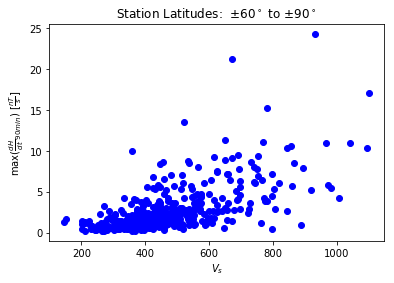

In [76]:
plt.scatter(result['vs'], result['highest90'], color ="blue")
plt.title('Station Latitudes:  $\pm 60^\circ$ to $\pm 90^\circ$')
plt.xlabel('$V_s$')
plt.ylabel('max($\\frac{dH}{dt}_{90min}$) [$\\frac{nT}{s}$]')
plt.show()

Now I want to add a best fit line:

In [72]:
x=np.array(result['vs'])
y=np.array(result['highest90'])
m,b=np.polyfit(x,y,1)
x=np.arange(x.min(), x.max(), 1)
y=m*x+b
plt.plot(x,m*x+b,color='red')